In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # naive bayes multinomial para clasificación
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.metrics import classification_report

# Análisis Exploratorio

In [2]:
df_nasa = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/asteroids_nasa.csv')
df_nasa.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
# verificamos los tipos de datos
df_nasa.dtypes

,0
Neo Reference ID,int64
Name,int64
Absolute Magnitude,float64
Est Dia in KM(min),float64
Est Dia in KM(max),float64
Est Dia in M(min),float64
Est Dia in M(max),float64
Est Dia in Miles(min),float64
Est Dia in Miles(max),float64
Est Dia in Feet(min),float64


In [4]:
print("Tamaño del dataframe : {}".format(df_nasa.shape))

Tamaño del dataframe : (4687, 40)


In [5]:
# Verificamos si hay valores nulos para imputar
df_nasa.isnull().sum()

,0
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0
Est Dia in M(min),0
Est Dia in M(max),0
Est Dia in Miles(min),0
Est Dia in Miles(max),0
Est Dia in Feet(min),0


Hazardous
False    3932
True      755
Name: count, dtype: int64


<Axes: xlabel='Hazardous', ylabel='count'>

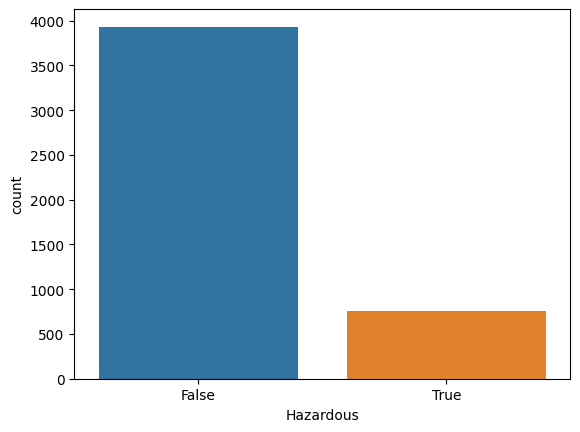

In [6]:
# Analisis de la distribución de la variable target "Hazardous"
print( df_nasa.Hazardous.value_counts() )
sns.countplot(x='Hazardous', data=df_nasa, hue='Hazardous', legend=False)

# Correlación de Variables

<Axes: >

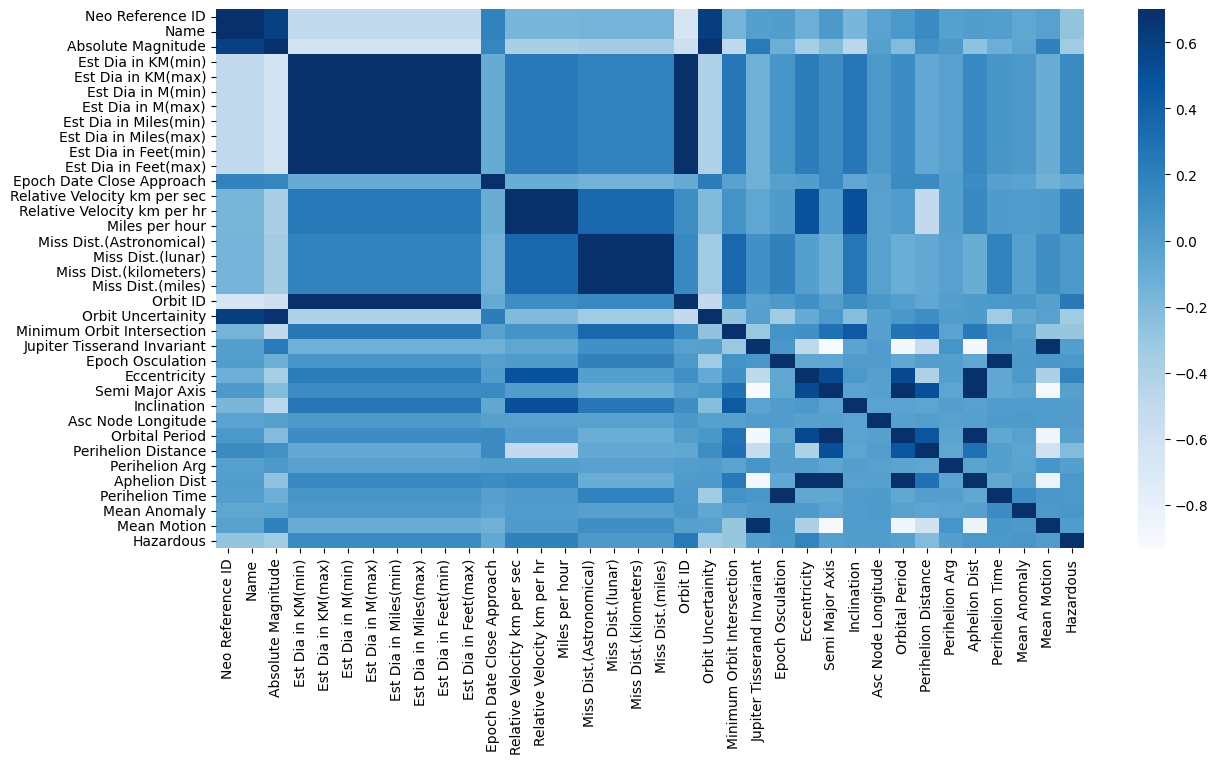

In [7]:
plt.figure(figsize=(14,7))
sns.heatmap(df_nasa.drop(['Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox'],axis=1).corr(), vmax=.7, cmap ='Blues', fmt=".2f")

In [8]:
df_nasa_corr = df_nasa.drop(['Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox'],axis=1).corr()[["Hazardous"]]*100 # lo pasamos a porcentajes
df_nasa_corr = df_nasa_corr.drop("Hazardous", axis=0) # eliminamos la variable target
df_nasa_corr = abs(df_nasa_corr) # nos interesa el valor absouluto
df_nasa_corr = df_nasa_corr.sort_values(["Hazardous"], ascending=False) # ordenamos en forma descendente
df_nasa_corr

,Hazardous
Orbit Uncertainity,32.872134
Absolute Magnitude,32.552193
Minimum Orbit Intersection,28.894902
Name,26.902814
Neo Reference ID,26.902814
Orbit ID,24.736904
Perihelion Distance,20.702693
Relative Velocity km per sec,19.197018
Miles per hour,19.197018
Relative Velocity km per hr,19.197018


# Seleccionamos las variables que vamos a utilizar y hacemos el Split

In [9]:
# dropeo ['Orbiting Body','Equinox'] porque en todos los casos es earth y J2000
df_nasa.drop(['Orbiting Body','Equinox'],axis=1, inplace=True)

In [10]:
df_nasa.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

In [11]:
df = df_nasa.drop(['Close Approach Date','Orbit Determination Date'],axis=1)
X_nasa = df.drop("Hazardous",axis=1)
y_nasa = df["Hazardous"]
X_nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [12]:
# Hacemos el Split 70-30 para train-test
X_train, X_test, y_train, y_test = train_test_split(X_nasa, y_nasa, test_size=0.3, stratify = y_nasa, random_state=0)

In [13]:
# Creamos y entrenamos el clasificador bayesiano
bayes_multi = MultinomialNB()
bayes_multi.fit(X_train, y_train) # entrenamos el clasificador

MultinomialNB()

In [14]:
y_pred_nb = bayes_multi.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_nb)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

Exactitud (accuracy) del modelo: 49.96 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.85      0.49      0.62      1180
        True       0.17      0.55      0.26       227

    accuracy                           0.50      1407
   macro avg       0.51      0.52      0.44      1407
weighted avg       0.74      0.50      0.56      1407



In [15]:
# Importamos otra librería para modelos naive bayes gausianos
from sklearn.naive_bayes import GaussianNB # naive bayes multinomial para clasificación

bayes_gauss = GaussianNB()
bayes_gauss.fit(X_train, y_train) # entrenamos el clasificador

GaussianNB()

In [16]:
# Calculamos y mostramos la matriz de confusión del modelo
y_pred_gauss = bayes_gauss.predict(X_test)
#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_gauss)*100))
print("-"*100)

print(classification_report(y_test,y_pred_gauss))

Exactitud (accuracy) del modelo: 83.87 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1180
        True       0.00      0.00      0.00       227

    accuracy                           0.84      1407
   macro avg       0.42      0.50      0.46      1407
weighted avg       0.70      0.84      0.77      1407



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Ejercicio

- identificar el parametro que estratifica el split del experimento
- ¿cómo se compara el performance del modelo de bayes multinomial con el de bayes gaussiano? Basado en las métricas, ¿cúal de los modelos es más útil?
- remover las variables redundantes/altamente codependientes como 'Est Dia in M(min)' y 'Est Dia in Miles(min)'
- ¿Que pasa con el accuracy en este ejercicio? ¿es el mejor indicador posible?

- El parametro que se utiliza para el stratify es Hazardous

- En este caso es mejor el naive bayes normal, ya que modelo gaussiano tiene el recall en 0 para True, osea que nunca detecta que un asteroide es peligroso y, en un caso como este (detección de amenazas), esto es inaceptable, aunque el accuracy sea más alto.

In [17]:
#remover las variables redundantes/altamente codependientes
import numpy as np
threshold = 0.95 #umbral de correlación del 95

corr_matrix = df_nasa.corr(numeric_only=True).abs() #Calcula la matriz de correlación y usa el valor absoluto

#Crea una máscara de la parte superior triangular de la matriz de correlación (sin la diagonal),
#para evitar comparar dos veces las mismas columnas (A con B y B con A).
#p.triu() genera una matriz con True solo en la parte superior.
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

#Recorre las columnas de la parte superior de la matriz y marca aquellas columnas que tienen alguna correlación mayor al umbral
#Crea una lista de columnas que se consideran redundantes y se deben eliminar.
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

#Elimina del DataFrame original las columnas marcadas como redundantes.
df_dropeado = df_nasa.drop(columns=to_drop)

df_nasa = df_dropeado
print(df_dropeado.columns)

Index(['Neo Reference ID', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg',
       'Mean Anomaly', 'Hazardous'],
      dtype='object')


- El accuracy no es el adecuado para este dataset, pensamos que el mas adecuado es recall porque es mas riesgoso no detectar que un asteroide es Hazardous